<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Voting_ensamble_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Voting Ensamble Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

# CLASS
class VotingEnsembleRegressor:
    def __init__(self, models):
        """
        Initialize the ensemble with user-defined models.
        """
        self.models = models
        self.ensemble = None

    def train(self, x_train, y_train):
        """
        Train the voting ensemble with selected models.
        """
        estimators = [(name, model) for name, model in self.models.items()]
        self.ensemble = VotingRegressor(estimators=estimators)
        self.ensemble.fit(x_train, y_train)

    def evaluate(self, x_train, y_train, x_test, y_test):
        """
        Compute MSE and R² scores for train and test sets.
        """
        y_train_pred = self.ensemble.predict(x_train)
        y_test_pred = self.ensemble.predict(x_test)

        metrics = {
            "train_mse": mean_squared_error(y_train, y_train_pred),
            "train_r2": r2_score(y_train, y_train_pred),
            "test_mse": mean_squared_error(y_test, y_test_pred),
            "test_r2": r2_score(y_test, y_test_pred)
        }
        return metrics

    def plot_results(self, x_test, y_test):
        """
        Plot actual vs. predicted values.
        """
        y_pred = self.ensemble.predict(x_test)
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs. Predicted Values")
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
        plt.show()

Evaluation Metrics: {'train_mse': 16.86258799005734, 'train_r2': 0.7327629730180402, 'test_mse': 17.744342779268813, 'test_r2': 0.6523483539386843}


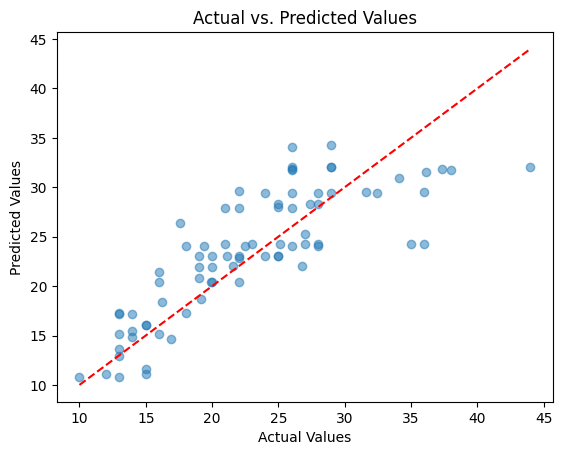

In [3]:

df = sns.load_dataset('mpg').dropna()
X = df[['horsepower']].values
y = df['mpg'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
        'svr': SVR(),
        'knn': KNeighborsRegressor(),
        'lr': LinearRegression()
}

ensemble = VotingEnsembleRegressor(models)
ensemble.train(X_train, y_train)
print("Evaluation Metrics:", ensemble.evaluate(X_train, y_train, X_test, y_test))
ensemble.plot_results(X_test, y_test)


## Multiple feature regressioin

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

class VotingEnsembleRegressor:
    def __init__(self, models):
        """
        Initialize the ensemble with user-defined models.
        """
        self.models = models
        self.ensemble = None

    def train(self, x_train, y_train):
        """
        Train the voting ensemble with selected models.
        """
        estimators = [(name, model) for name, model in self.models.items()]
        self.ensemble = VotingRegressor(estimators=estimators)
        self.ensemble.fit(x_train, y_train)

    def evaluate(self, x_train, y_train, x_test, y_test):
        """
        Compute MSE and R² scores for train and test sets.
        """
        y_train_pred = self.ensemble.predict(x_train)
        y_test_pred = self.ensemble.predict(x_test)

        metrics = {
            "train_mse": mean_squared_error(y_train, y_train_pred),
            "train_r2": r2_score(y_train, y_train_pred),
            "test_mse": mean_squared_error(y_test, y_test_pred),
            "test_r2": r2_score(y_test, y_test_pred)
        }
        return metrics

    def plot_results(self, y_test, y_pred):
        """
        Plot actual vs. predicted values.
        """
        plt.scatter(y_test, y_pred, alpha=0.5)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title("Actual vs. Predicted Values")
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed')
        plt.show()